## **Day Trading - Inertia Strategy (S&P 500 & Boeing)**

### **Overview**
This project explores a **day trading “inertia” strategy** designed to capitalize on short-term price momentum in stock trading. The approach assumes that **overnight price movements tend to persist during the following trading day**. Using daily stock data (`Open` and `Close` prices), the strategy determines whether to take a *long* or *short* position at market open and close it by the end of the day.

The trading rules are as follows:
1. **Positive Overnight Return (Long Position)**  
   If the `Open` price is higher than the previous day’s `Close` price, this indicates a positive overnight return. The trader invests **$100** to buy shares at the `Open` price and sells them at the `Close` price, profiting from a potential intraday increase.  
   - **Profit/Loss per share:** `Close - Open`

2. **Negative Overnight Return (Short Position)**  
   If the `Open` price is lower than the previous day’s `Close` price, this signals a negative overnight return. The trader sells short **$100** worth of shares at the `Open` price and repurchases them at the `Close` price, profiting if the price continues to fall.  
   - **Profit/Loss per share:** `Open - Close`

3. **Trading Assumptions**  
   - The strategy trades **every day** unless the `Open` price equals the previous day’s `Close` price.  
   - Each trade uses a fixed **$100 investment**.  
   - **Transaction costs are ignored** for simplicity.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
spy_df = pd.read_csv('SPY.csv', skiprows=[1])
ba_df = pd.read_csv('ba.csv', skiprows=[1])

In [18]:
spy_df.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Return,Short_MA,Long_MA
0,2020-01-02,2020,1,2,Thursday,0,2020-00,298.18,299.42,297.25,299.41,59151200,0.000000,299.410000,299.410000
1,2020-01-03,2020,1,3,Friday,0,2020-00,295.99,298.27,295.93,297.14,77709700,-0.007572,298.275000,298.275000
2,2020-01-06,2020,1,6,Monday,1,2020-01,295.37,298.36,295.25,298.27,55653900,0.003815,298.273333,298.273333
3,2020-01-07,2020,1,7,Tuesday,1,2020-01,297.70,298.18,296.98,297.43,40496400,-0.002811,298.062500,298.062500
4,2020-01-08,2020,1,8,Wednesday,1,2020-01,297.63,300.25,297.38,299.02,68296000,0.005329,298.254000,298.254000


In [19]:
ba_df.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Return,Short_MA,Long_MA
0,2020-01-03,2020,1,3,Friday,0,2020-00,328.67,332.91,328.35,330.79,3875900,-0.001680,331.070000,331.070000
1,2020-01-06,2020,1,6,Monday,1,2020-01,327.35,332.88,325.94,331.77,5355000,0.002945,331.303333,331.303333
2,2020-01-07,2020,1,7,Tuesday,1,2020-01,332.28,342.15,328.75,335.29,9898600,0.010607,332.300000,332.300000
3,2020-01-08,2020,1,8,Wednesday,1,2020-01,330.43,332.05,327.65,329.41,8239200,-0.017523,331.722000,331.722000
4,2020-01-09,2020,1,9,Thursday,1,2020-01,332.97,339.71,330.09,334.35,8175600,0.014998,332.160000,332.160000


In [20]:
def inertia(df):
    df_inertia = df[['Weekday', 'Open', 'Close']].copy()
    prev_close = df_inertia['Close'].shift(1)
    curr_open = df_inertia['Open']
    curr_close = df_inertia['Close']
    df_inertia['overnight_return'] = round(((curr_open - prev_close) / prev_close) * 100, 2)

    long_cond = curr_open > prev_close
    short_cond = curr_open < prev_close
    long_pos = round((curr_close - curr_open) * (100 / curr_open), 2)
    short_pos = round((curr_open - curr_close) * (100 / curr_open), 2)

    df_inertia.loc[long_cond, 'decision'] = 'buy'
    df_inertia.loc[short_cond, 'decision'] = 'sell short'
    df_inertia['P/L per share'] = np.where(long_cond, long_pos, np.where(short_cond, short_pos, np.nan))

    return df_inertia

The function inertia() calculates our day-trading strategy for an input stock DataFrame. In this case, we compare two stocks: the S&P 500 and Boeing over the past five years.

When today’s Open price is higher than the previous day’s Close price, we buy $100 worth of shares, assuming that the upward movement will continue, and sell them at the same day’s Close price.

When today’s Open price is lower than the previous day’s Close price, we take a short position: selling $100 worth of shares at the Open and buying them back at the Close.

In [21]:
spy_inertia = inertia(spy_df)
spy_inertia.head()

,Weekday,Open,Close,overnight_return,decision,P/L per share
0,Thursday,298.18,299.41,NaN,NaN,NaN
1,Friday,295.99,297.14,-1.14,sell short,-0.39
2,Monday,295.37,298.27,-0.60,sell short,-0.98
3,Tuesday,297.70,297.43,-0.19,sell short,0.09
4,Wednesday,297.63,299.02,0.07,buy,0.47


In [22]:
ba_inertia = inertia(ba_df)
ba_inertia.head()

,Weekday,Open,Close,overnight_return,decision,P/L per share
0,Friday,328.67,330.79,NaN,NaN,NaN
1,Monday,327.35,331.77,-1.04,sell short,-1.35
2,Tuesday,332.28,335.29,0.15,buy,0.91
3,Wednesday,330.43,329.41,-1.45,sell short,0.31
4,Thursday,332.97,334.35,1.08,buy,0.41


In [23]:
print(f"Avg daily profit for S&P 500: {round(np.mean(spy_inertia['P/L per share']), 2)}")
print(f"Avg daily profit for Boeing: {round(np.mean(ba_inertia['P/L per share']), 2)}")

Avg daily profit for S&P 500: 0.01
Avg daily profit for Boeing: 0.09


After applying our trading strategy, we calculated the average profit/loss for each stock. The results show that Boeing performs better, with an average profit of 0.08, compared to 0.01 for the S&P 500 (SPY).

In [24]:
print("S&P 500 (Average profit):")
print(f'Long positions: {round(np.mean(spy_inertia[spy_inertia['decision'] == 'buy']['P/L per share']), 2)}')
print(f'Short positions: {round(np.mean(spy_inertia[spy_inertia['decision'] == 'sell short']['P/L per share']), 2)}\n')


print("Boeing (Average profit):")
print(f'Long positions: {round(np.mean(ba_inertia[ba_inertia['decision'] == 'buy']['P/L per share']), 3)}')
print(f'Short positions: {round(np.mean(ba_inertia[ba_inertia['decision'] == 'sell short']['P/L per share']), 3)}')


S&P 500 (Average profit):
Long positions: 0.03
Short positions: -0.02

Boeing (Average profit):
Long positions: -0.002
Short positions: 0.181


Next, we compute results separately for long and short positions.

For the S&P 500 (SPY), long positions yield a small profit (0.03), while short positions result in a loss (–0.02).
For Boeing, long positions break even with no profit or loss, whereas short positions generate a modest gain (0.02).

Thus, the strategy produces different outcomes depending on the stock: SPY benefits slightly from long trades, while Boeing shows value primarily in short trades.

### **Threshold-Based Overnight Return Strategy**

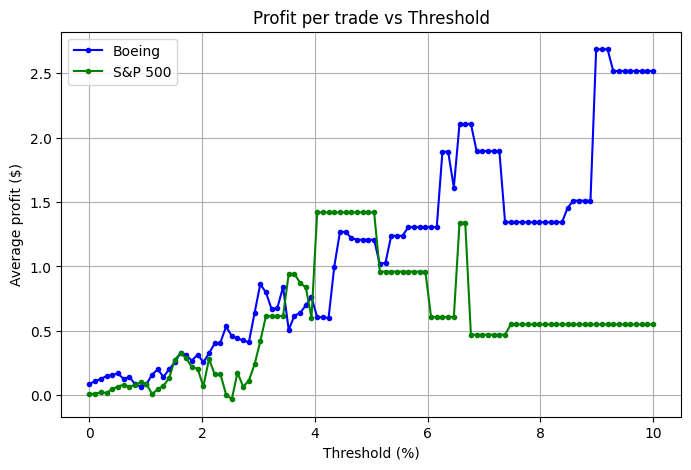

In [25]:
thresholds = np.linspace(0, 10, 100)

spy_avg_profit = []
ba_avg_profit = []
for th in thresholds:
    
    spy_th = spy_inertia[spy_inertia['overnight_return'].abs() > th]['P/L per share']
    ba_th = ba_inertia[ba_inertia['overnight_return'].abs() > th]['P/L per share']
    
    spy_avg_profit.append(spy_th.mean() if not spy_th.empty else np.nan)
    ba_avg_profit.append(ba_th.mean() if not ba_th.empty else np.nan)

plt.figure(figsize=(8,5))
plt.plot(thresholds, ba_avg_profit, color='blue', marker='o', markersize=3, label="Boeing")
plt.plot(thresholds, spy_avg_profit, color='green', marker='o', markersize=3, label="S&P 500")
plt.xlabel("Threshold (%)")
plt.ylabel("Average profit ($)")
plt.title("Profit per trade vs Threshold")
plt.grid(True)
plt.legend()
plt.show()

The plot above shows relationship between profit per trade and threshold for two stocks: Boeing (blue) and S&P 500 (green). From the plot we can see that both stocks start with very small profits when the threshold is 0. And once a threshold is applied, the average profit per trade improves.

For the S&P 500, the profits peak when the threshold is around 4–5%, reaching about 1.4 $ per trade. Beyong this point, the profits decline slightly, making these threshold values as optimal.

For Boeing we see quite different picture. Profits continue to grow as the threshold increases, with the highest values above 2.5 $ when the threshold is around 9–10%. This indicates Boeing benefits more from focusing only on extreme overnight moves.

### **Threshold-Based Overnight Return Strategy: Long vs. Short Positions**

In [26]:
thresholds = np.linspace(0, 10, 100)

spy_avg_profit_long = []
spy_avg_profit_short = []

ba_avg_profit_long = []
ba_avg_profit_short = []

for th in thresholds:
    # SPY data
    spy_th_long = spy_inertia[(spy_inertia['decision'] == 'buy') & (spy_inertia['overnight_return'].abs() > th)]['P/L per share']
    spy_th_short = spy_inertia[(spy_inertia['decision'] == 'sell short') & (spy_inertia['overnight_return'].abs() > th)]['P/L per share']
    
    spy_avg_profit_long.append(spy_th_long.mean() if not spy_th_long.empty else np.nan)
    spy_avg_profit_short.append(spy_th_short.mean() if not spy_th_short.empty else np.nan)
    
    # Boeing data
    ba_th_long = ba_inertia[(ba_inertia['decision'] == 'buy') & (ba_inertia['overnight_return'].abs() > th)]['P/L per share']
    ba_th_short = ba_inertia[(ba_inertia['decision'] == 'sell short') & (ba_inertia['overnight_return'].abs() > th)]['P/L per share']
    
    ba_avg_profit_long.append(ba_th_long.mean() if not ba_th_long.empty else np.nan)
    ba_avg_profit_short.append(ba_th_short.mean() if not ba_th_short.empty else np.nan)

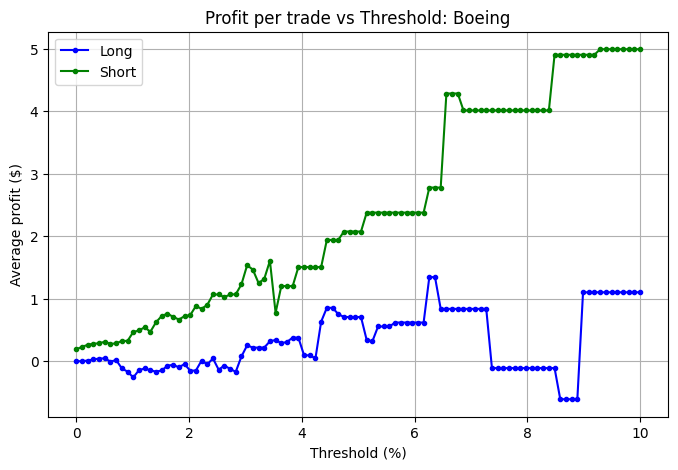

In [27]:
plt.figure(figsize=(8,5))
plt.plot(thresholds, ba_avg_profit_long, color='blue', marker='o', markersize=3, label='Long')
plt.plot(thresholds, ba_avg_profit_short, color='green', marker='o', markersize=3, label='Short')
plt.xlabel("Threshold (%)")
plt.ylabel("Average profit ($)")
plt.title("Profit per trade vs Threshold: Boeing")
plt.grid(True)
plt.legend()
plt.show()

Looking at Boeing we see clear pattern: short positions outperform long positions across most thresholds. Short trades steadily gain as the threshold increases, reaching roughly $5 per trade when the overnight move exceeds 9–10%. In contrast, long trades are modestly profitable at low–mid thresholds but turn negative around 8–9%, suggesting large overnight gaps up don’t reliably continue intraday for Boeing.

Thus the strategy is most effective for short positions, whereas entering long positions after sharp overnight increases tends to be risky and often leads to weaker performance.

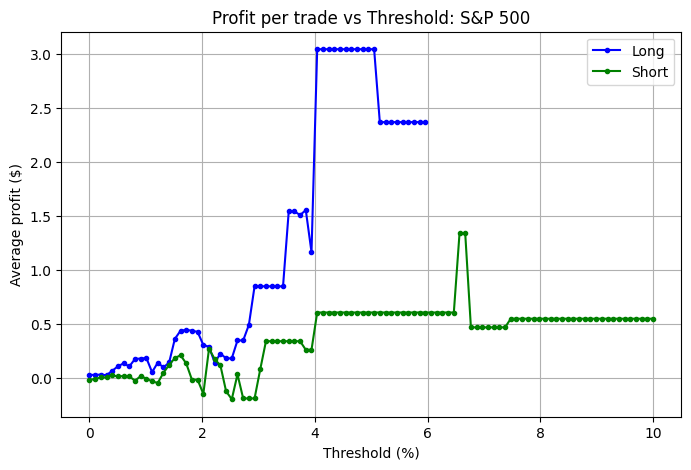

In [28]:
plt.figure(figsize=(8,5))
plt.plot(thresholds, spy_avg_profit_long, color='blue', marker='o', markersize=3, label="Long")
plt.plot(thresholds, spy_avg_profit_short, color='green', marker='o', markersize=3, label="Short")
plt.xlabel("Threshold (%)")
plt.ylabel("Average profit ($)")
plt.title("Profit per trade vs Threshold: S&P 500")
plt.grid(True)
plt.legend()
plt.show()

For the S&P 500, long positions improve steadily as the threshold rises, reaching up to $3 per trade when the overnight return exceeds about 4%. In contrast, short positions only begin to show consistent gains once the threshold is above 3%, and even then, their profits remain modest compared to long trades.

Thus for SPY, our strategy works well with long positions.


### **Distribution of last digit(cent position) for the "Open" prices**

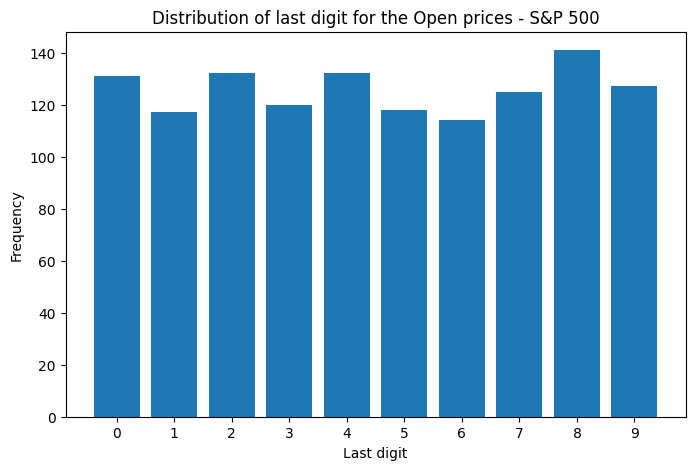

In [29]:
# distribution of last digit(cent position) $298.18 -> 8
# SPY
last_digit = ((spy_df['Open'] * 100).astype(int) % 10)

plt.figure(figsize=(8,5))
plt.hist(last_digit, bins=np.arange(-0.5, 10.5, 1), rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Last digit")
plt.ylabel("Frequency")
plt.title("Distribution of last digit for the Open prices - S&P 500")
plt.show()

For SPY the distribution of last digits in Open price is quite similar. The digit 8 appears slightly more often, with over 140 occurrences, but overall the differences across digits are not large. There is no clear pattern in the cents position that traders could exploit.

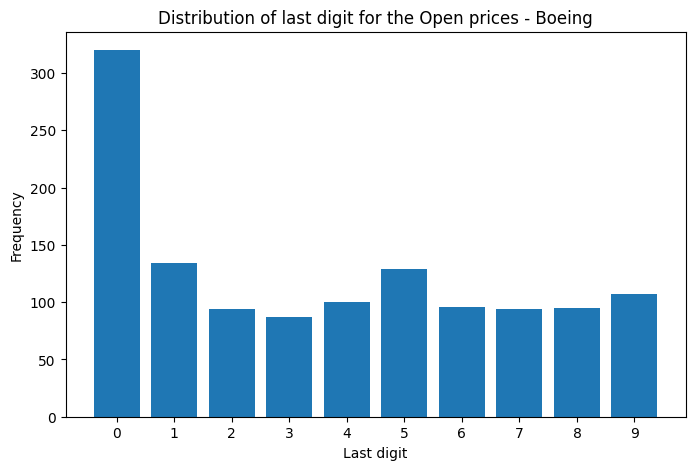

In [30]:
# Boeing
last_digit = ((ba_df['Open'] * 100).astype(int) % 10)

plt.figure(figsize=(8,5))
plt.hist(last_digit, bins=np.arange(-0.5, 10.5, 1), rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Last digit")
plt.ylabel("Frequency")
plt.title("Distribution of last digit for the Open prices - Boeing")
plt.show()

For Boeing we see clear imbalance, the digit 0 dominates, appearing in more than 300 cases, while the other digits occur far less frequently and more evenly spread out. Such rounding behavior indicates a stronger bias in how Boeing’s prices are set in the market.